## Load Modules

In [20]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras_visualizer import visualizer
from tensorflow.keras.preprocessing.image import load_img,img_to_array,save_img,ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Activation,Flatten,GlobalAveragePooling2D,Dropout,BatchNormalization,Conv2D,MaxPooling2D

## Tensorflow Version & GPU checking

In [2]:
tf.__version__

'2.9.0'

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11658849398631149068
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1738696295
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15927895718339571625
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


## Load Dataset

In [4]:
Train_Dir = '../../Datasets/Brain_tumor/Training/'
Testing_Dir = '../../Datasets/Brain_tumor/Testing/'

In [5]:
gen = ImageDataGenerator(rescale=1./255.0)

In [6]:
Train_Data = gen.flow_from_directory(Train_Dir,target_size=(128,128),shuffle=True,batch_size=16)
Test_Data = gen.flow_from_directory(Testing_Dir,target_size=(128,128),shuffle=True,batch_size=16)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [7]:
Train_Data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

## Model

In [8]:
Base_Model = VGG19(include_top=False,input_shape=(128,128,3))

In [9]:
Base_Model.trainable = False

In [10]:
def classification_layer():
    Classification_Layer = [
    Flatten(),
    BatchNormalization(),
    Dense(units=128,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units=64,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units=4,activation='softmax')
    ]
    return Classification_Layer

In [11]:
model = [Base_Model]
for cls_layer in classification_layer():
    model.append(cls_layer)

In [12]:
final_model = Sequential(model)

In [13]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

## Compile

In [14]:
callback = EarlyStopping(monitor='loss',patience=3)

In [15]:
checkpoint = ModelCheckpoint(filepath='../../Models/Brain_Tumor/Brain_Tumor_VGG19.hdf5',monitor='val_loss',save_best_only=True,verbose=0,mode='auto')

In [16]:
final_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

## Training

In [17]:
history = final_model.fit(Train_Data,validation_data=Test_Data,epochs=100,callbacks=[callback,checkpoint])

Epoch 1/100
357/357 [==============================] - 69s 182ms/step - loss: 0.6142 - acc: 0.7612 - val_loss: 0.3762 - val_acc: 0.8581
Epoch 2/100
357/357 [==============================] - 22s 60ms/step - loss: 0.3887 - acc: 0.8559 - val_loss: 0.2869 - val_acc: 0.8909
Epoch 3/100
357/357 [==============================] - 23s 63ms/step - loss: 0.3323 - acc: 0.8773 - val_loss: 0.2106 - val_acc: 0.9207
Epoch 4/100
357/357 [==============================] - 22s 62ms/step - loss: 0.2589 - acc: 0.9051 - val_loss: 0.1895 - val_acc: 0.9252
Epoch 5/100
357/357 [==============================] - 25s 70ms/step - loss: 0.2497 - acc: 0.9060 - val_loss: 0.1719 - val_acc: 0.9359
Epoch 6/100
357/357 [==============================] - 28s 77ms/step - loss: 0.2188 - acc: 0.9202 - val_loss: 0.1489 - val_acc: 0.9474
Epoch 7/100
357/357 [==============================] - 28s 77ms/step - loss: 0.1839 - acc: 0.9315 - val_loss: 0.1753 - val_acc: 0.9390
Epoch 8/100
357/357 [==============================] -

## Save Model

In [18]:
final_model.save('../../Models/Brain_Tumor/Brain_Tumor_VGG19.h5')

## Graph

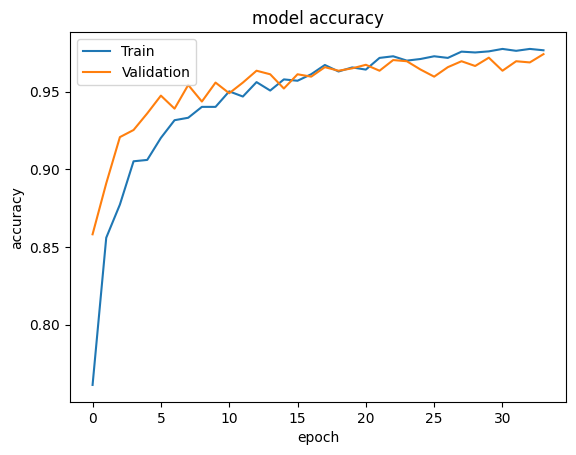

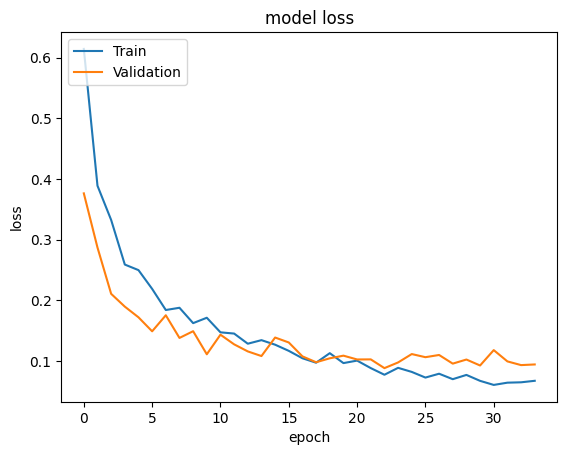

In [26]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()